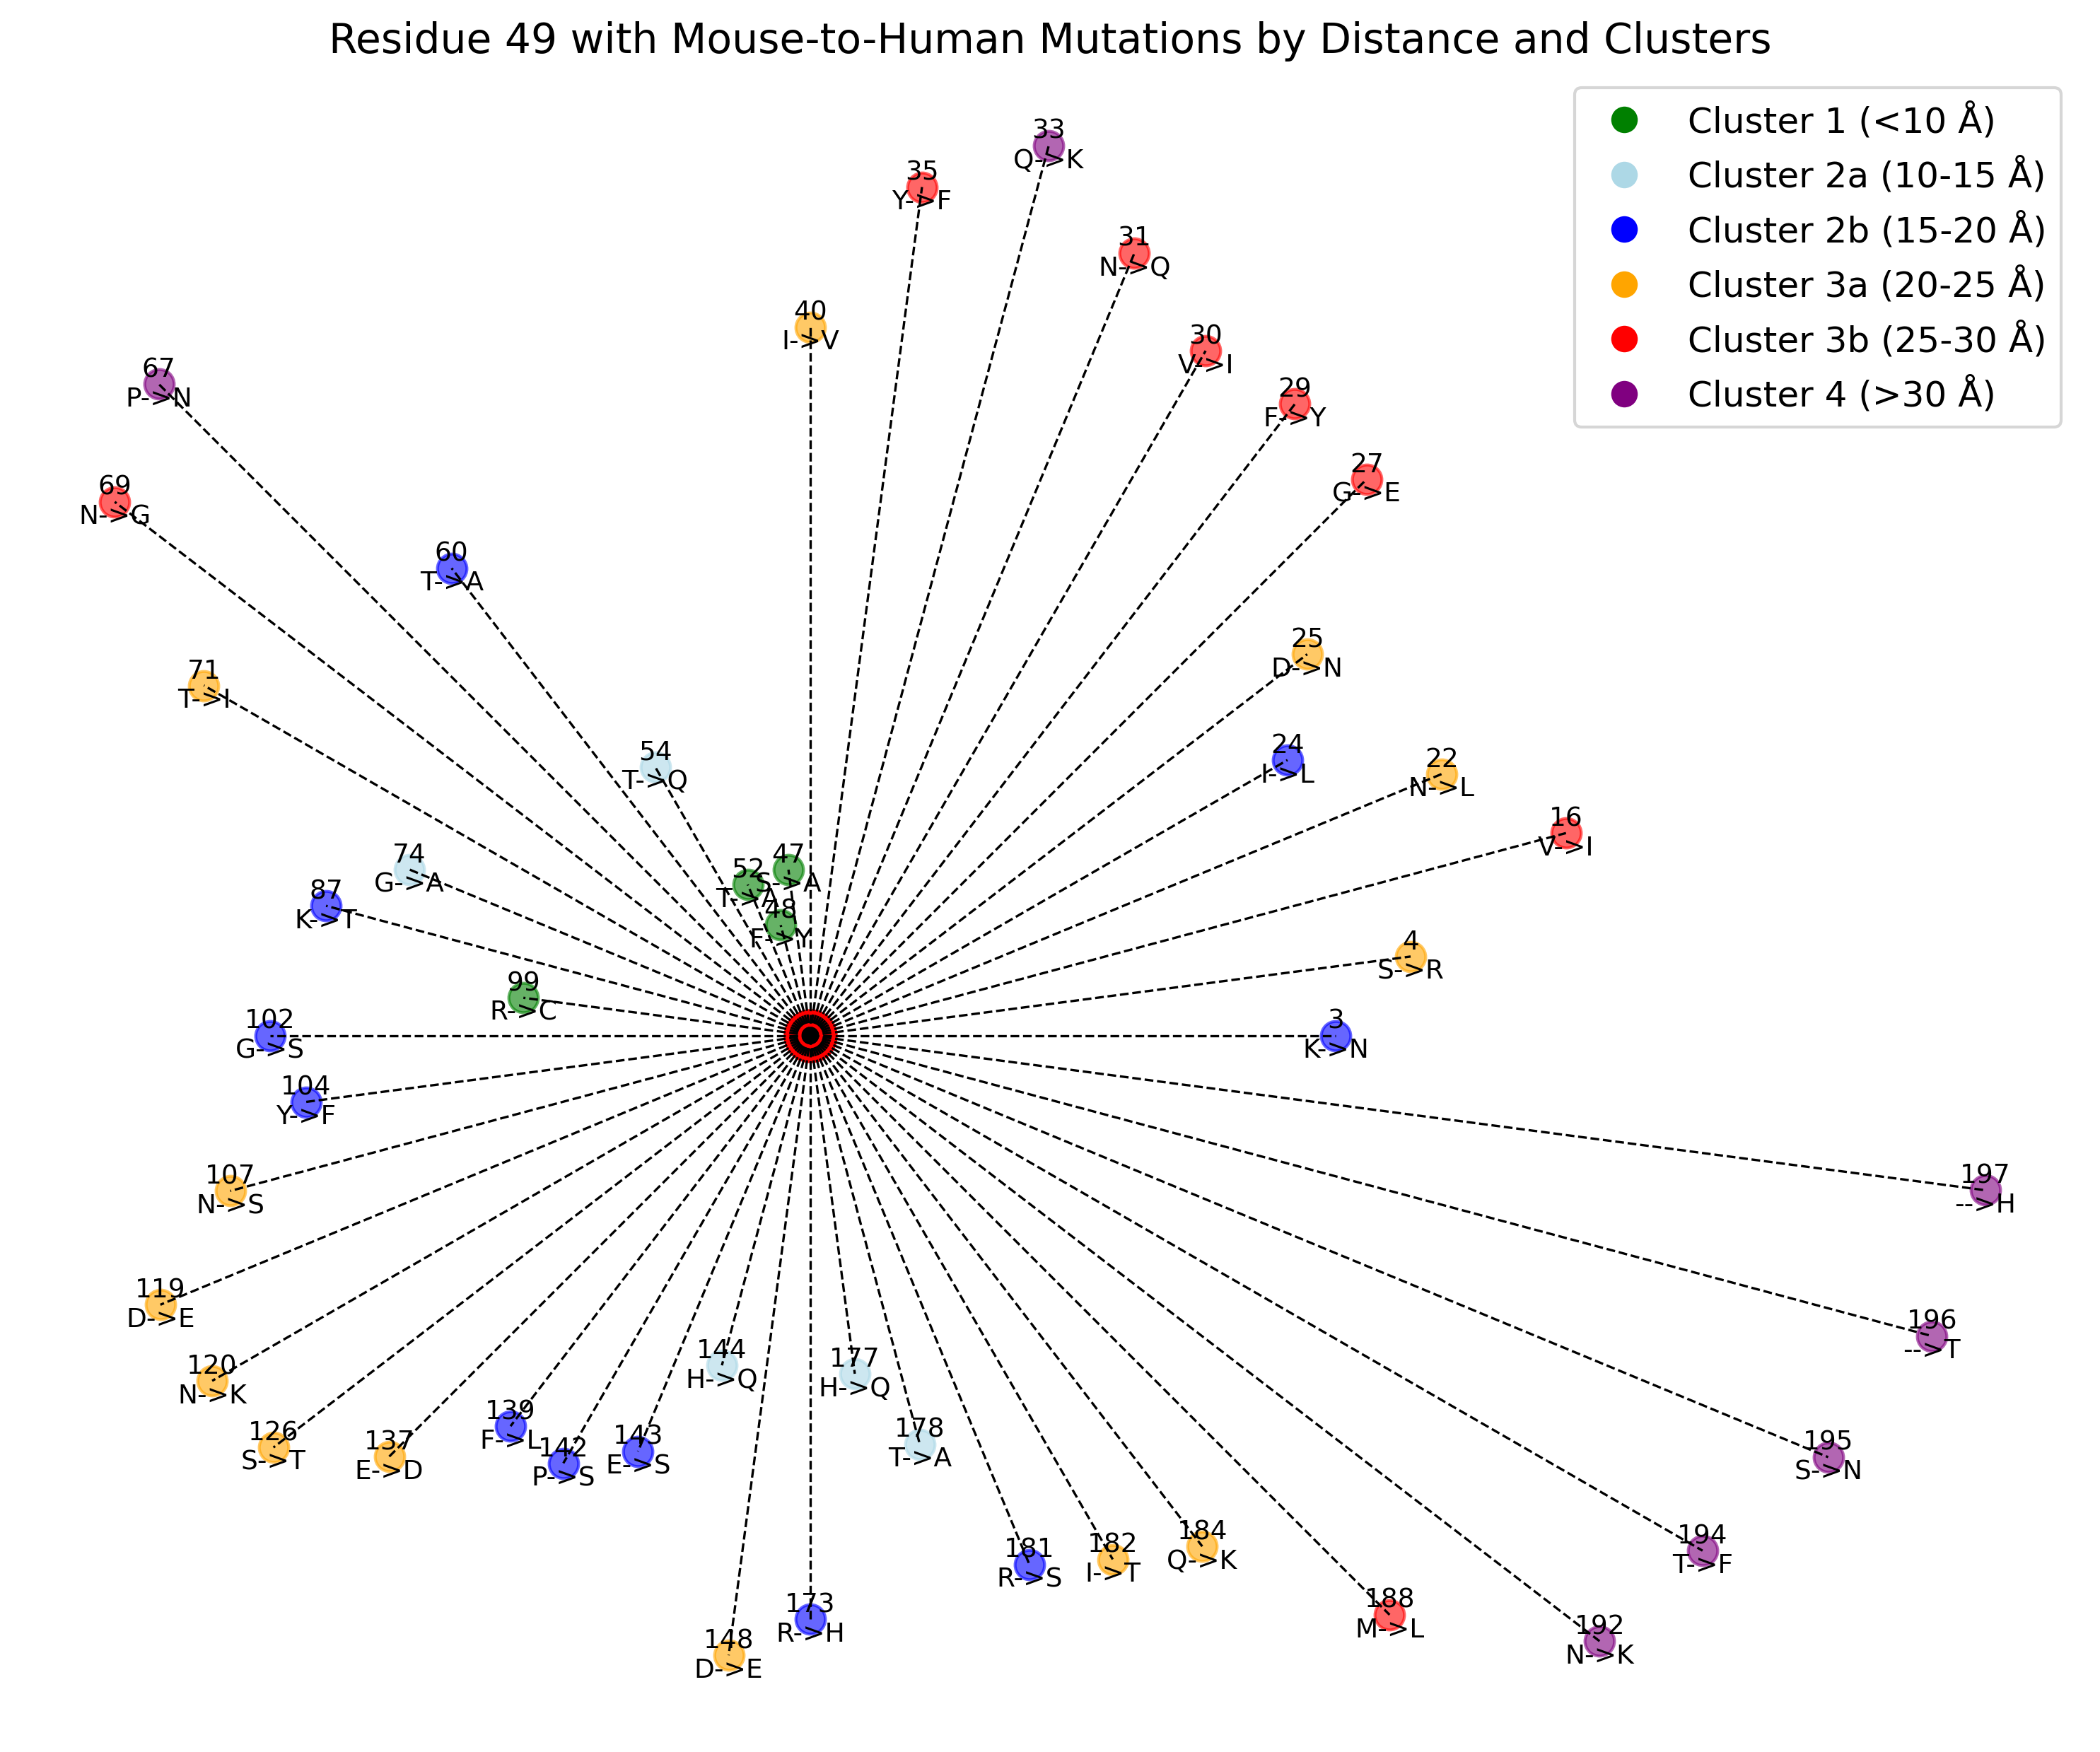

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Residue distances with Mouse as reference (Position, Mouse Cys, Human Cys, Distance in Å)
residues = [
    (3, 'K', 'N', 17.66), (4, 'S', 'R', 20.34), (16, 'V', 'I', 26.28),
    (22, 'N', 'L', 22.95), (24, 'I', 'L', 18.51), (25, 'D', 'N', 21.04),
    (27, 'G', 'E', 26.43), (29, 'F', 'Y', 26.74), (30, 'V', 'I', 26.56),
    (31, 'N', 'Q', 28.45), (33, 'Q', 'K', 30.95), (35, 'Y', 'F', 28.75),
    (40, 'I', 'V', 23.80), (47, 'S', 'A', 5.62), (48, 'F', 'Y', 3.84),
    (52, 'T', 'A', 5.49), (54, 'T', 'Q', 10.42), (60, 'T', 'A', 19.79),
    (67, 'P', 'N', 30.95), (69, 'N', 'G', 29.45), (71, 'T', 'I', 23.52),
    (74, 'G', 'A', 14.58), (87, 'K', 'T', 16.84), (99, 'R', 'C', 9.72),
    (102, 'G', 'S', 18.15), (104, 'Y', 'F', 17.08), (107, 'N', 'S', 20.17),
    (119, 'D', 'E', 23.63), (120, 'N', 'K', 23.20), (126, 'S', 'T', 22.73),
    (137, 'E', 'D', 20.00), (139, 'F', 'L', 16.54), (142, 'P', 'S', 16.59),
    (143, 'E', 'S', 15.12), (144, 'H', 'Q', 11.47), (148, 'D', 'E', 21.00),
    (173, 'R', 'H', 19.61), (177, 'H', 'Q', 11.46), (178, 'T', 'A', 14.21),
    (181, 'R', 'S', 19.23), (182, 'I', 'T', 20.32), (184, 'Q', 'K', 21.63),
    (188, 'M', 'L', 27.52), (192, 'N', 'K', 33.42), (194, 'T', 'F', 34.61),
    (195, 'S', 'N', 37.01), (196, '-', 'T', 39.01), (197, '-', 'H', 39.81)
]

# Angles for plotting circular layout
angles = np.linspace(0, 2 * np.pi, len(residues), endpoint=False)

# Save path for the figure
save_path = '/home/hp/nayanika/github/GPX6/figures/Residue_mouse_Distances.png'

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
ax.set_aspect('equal')

# Plot residue 49 at the center (red circle)
ax.scatter(0, 0, s=300, color='red', label='Residue 49')

# Define clusters based on distance ranges
def get_cluster(dist):
    if dist < 10:
        return 'Cluster 1', 'green'
    elif 10 <= dist < 15:
        return 'Cluster 2a', 'lightblue'
    elif 15 <= dist < 20:
        return 'Cluster 2b', 'blue'
    elif 20 <= dist < 25:
        return 'Cluster 3a', 'orange'
    elif 25 <= dist < 30:
        return 'Cluster 3b', 'red'
    else:
        return 'Cluster 4', 'purple'

# Plot residues around the center based on distances
for i, (residue, mouse, human, dist) in enumerate(residues):
    # Get cluster information
    cluster_label, color = get_cluster(dist)

    # Calculate x and y coordinates
    x = dist * np.cos(angles[i])
    y = dist * np.sin(angles[i])

    # Plot circles for residues
    ax.scatter(x, y, s=100, color=color, label=cluster_label if i == 0 else "", alpha=0.6)

    # Annotate residue transformations (Mouse -> Human)
    ax.text(x, y, f"{residue}\n{mouse}->{human}", fontsize=9, ha='center', va='center')

    # Draw a line from the center to each residue
    ax.plot([0, x], [0, y], color='black', linestyle='--', linewidth=0.8)

# Create cluster legend
cluster_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 1 (<10 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Cluster 2a (10-15 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 2b (15-20 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Cluster 3a (20-25 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Cluster 3b (25-30 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Cluster 4 (>30 Å)')
]
ax.legend(handles=cluster_handles, loc='upper right', fontsize=12)

# Set plot title
ax.set_title('Residue 49 with Mouse-to-Human Mutations by Distance and Clusters', fontsize=14)

# Remove axes for better visualization
ax.axis('off')

# Tight layout and save the figure
plt.tight_layout()
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show plot (optional)
plt.show()


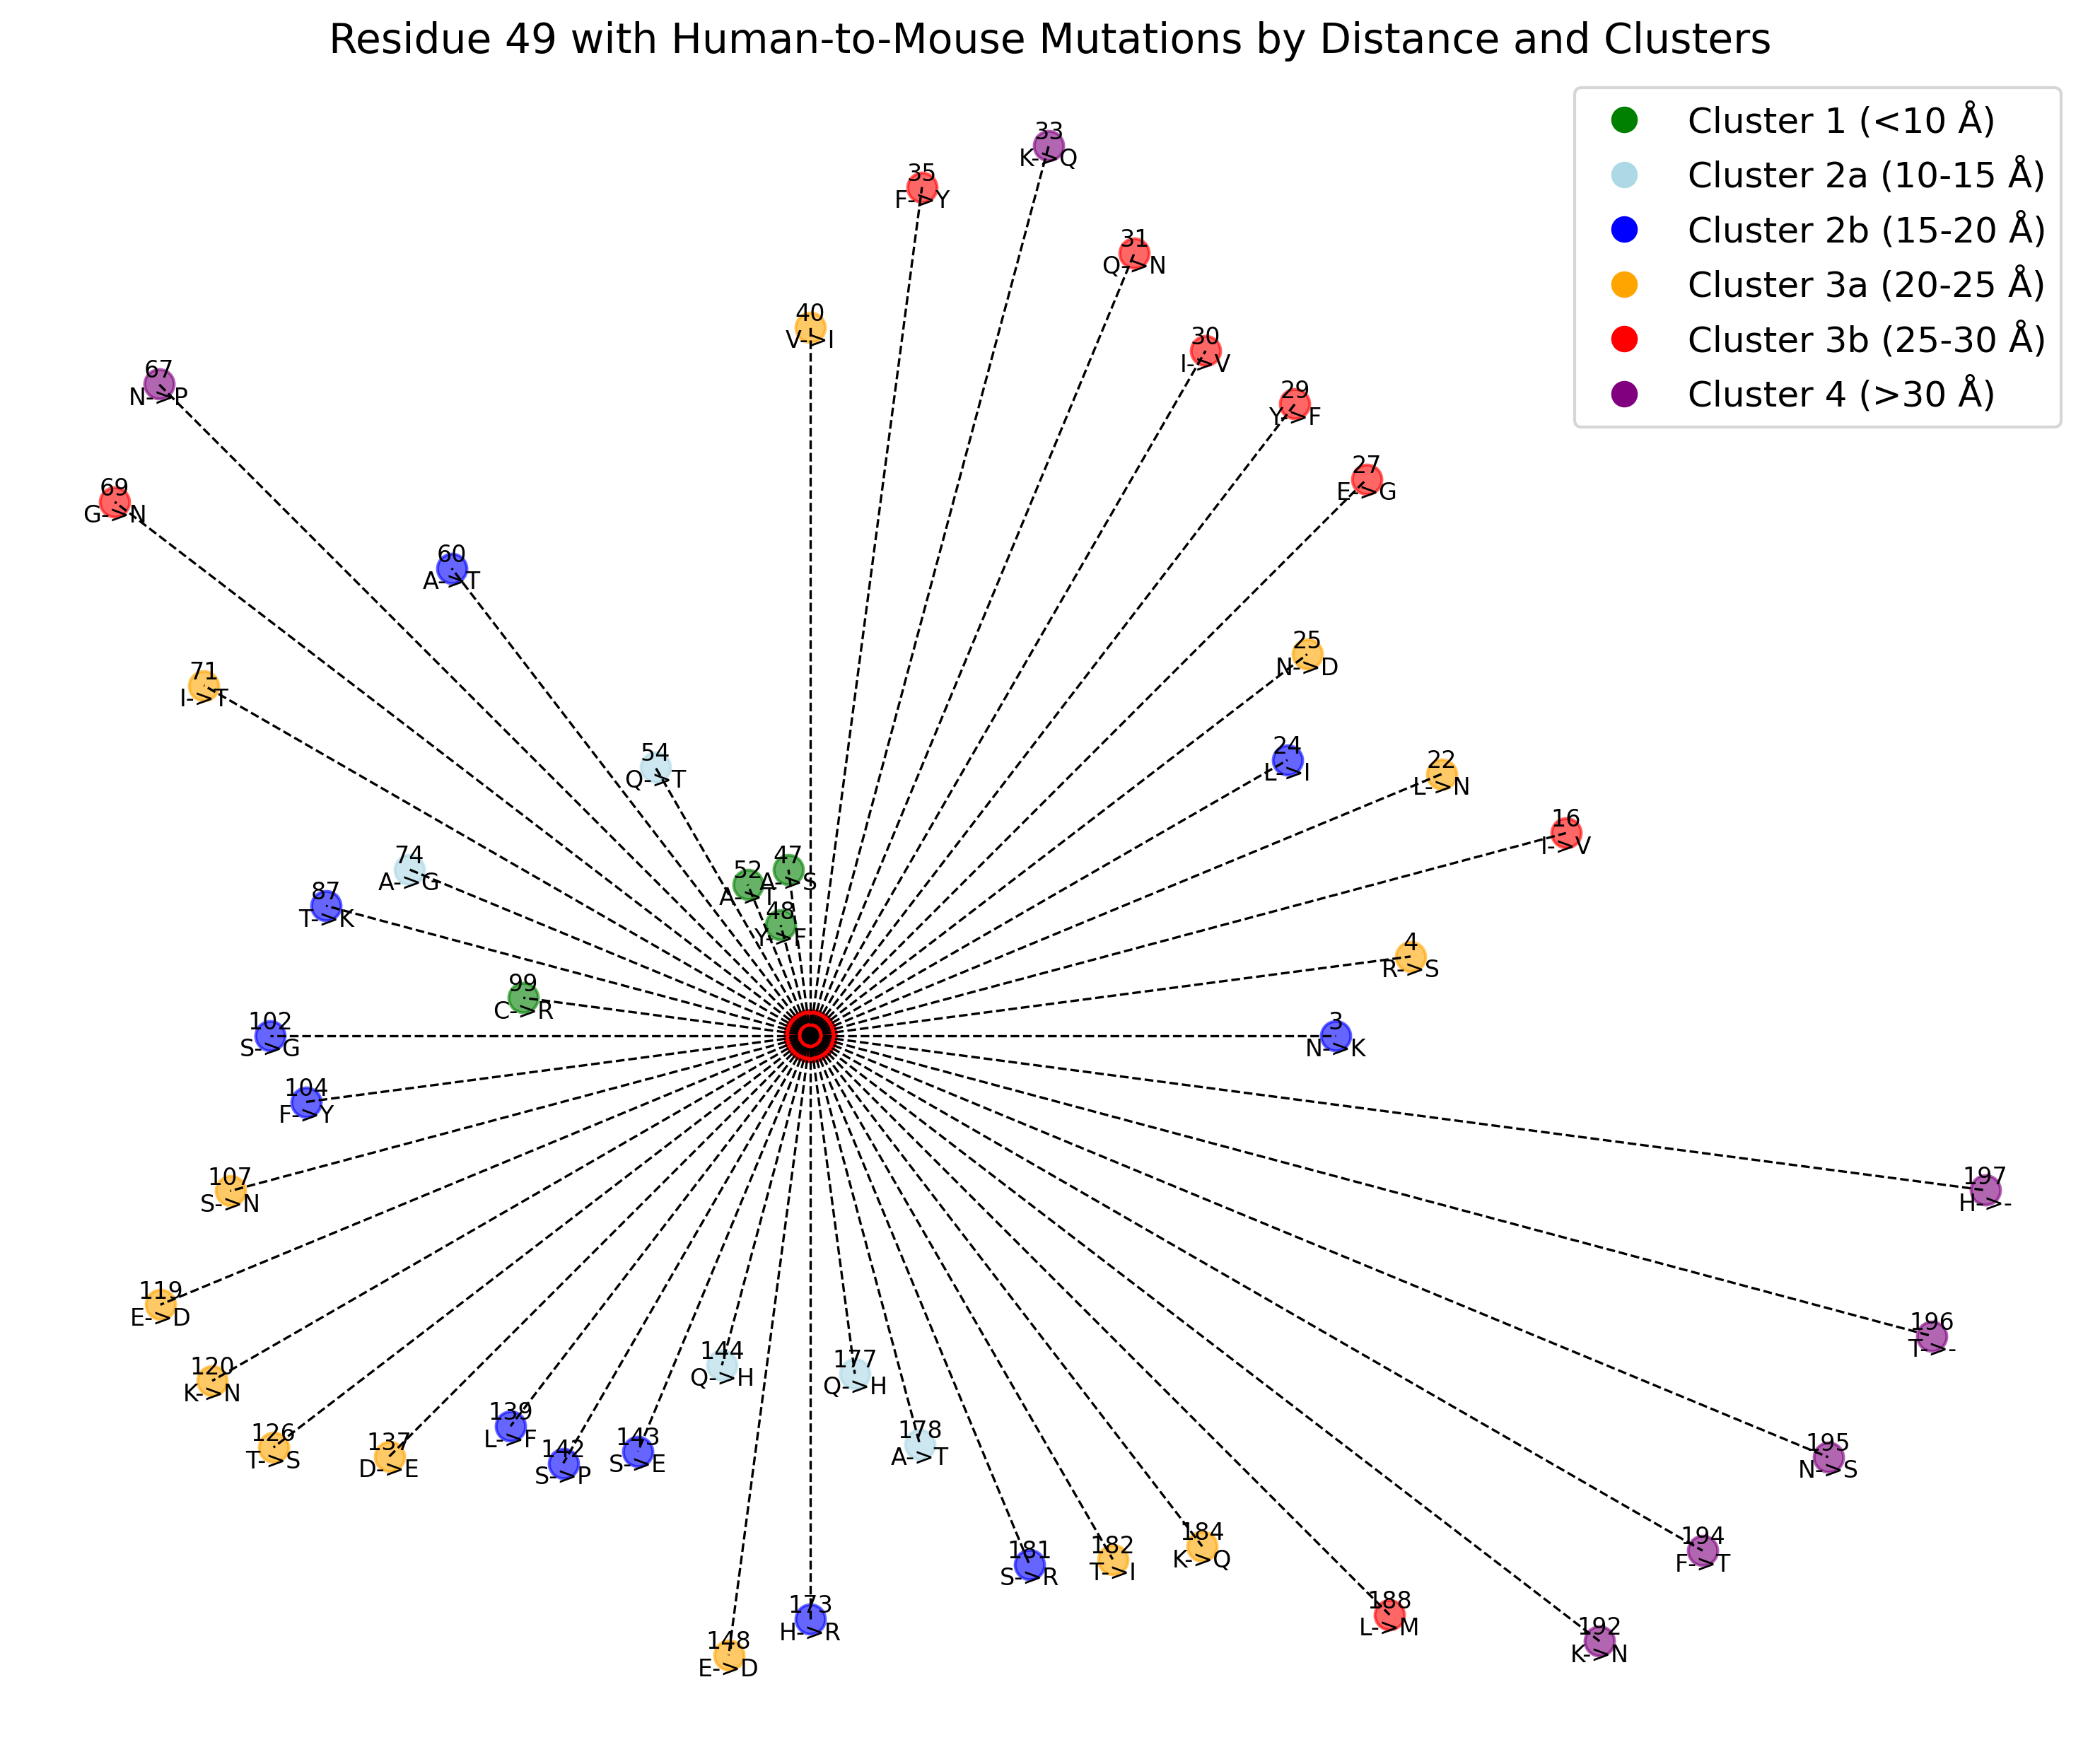

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Updated Residue distances: (Position, Human Cys, Mouse Cys, Distance in Å)
residues = [
    (3, 'N', 'K', 17.66), (4, 'R', 'S', 20.34), (16, 'I', 'V', 26.28),
    (22, 'L', 'N', 22.95), (24, 'L', 'I', 18.51), (25, 'N', 'D', 21.04),
    (27, 'E', 'G', 26.43), (29, 'Y', 'F', 26.74), (30, 'I', 'V', 26.56),
    (31, 'Q', 'N', 28.45), (33, 'K', 'Q', 30.95), (35, 'F', 'Y', 28.75),
    (40, 'V', 'I', 23.80), (47, 'A', 'S', 5.62), (48, 'Y', 'F', 3.84),
    (52, 'A', 'T', 5.49), (54, 'Q', 'T', 10.42), (60, 'A', 'T', 19.79),
    (67, 'N', 'P', 30.95), (69, 'G', 'N', 29.45), (71, 'I', 'T', 23.52),
    (74, 'A', 'G', 14.58), (87, 'T', 'K', 16.84), (99, 'C', 'R', 9.72),
    (102, 'S', 'G', 18.15), (104, 'F', 'Y', 17.08), (107, 'S', 'N', 20.17),
    (119, 'E', 'D', 23.63), (120, 'K', 'N', 23.20), (126, 'T', 'S', 22.73),
    (137, 'D', 'E', 20.00), (139, 'L', 'F', 16.54), (142, 'S', 'P', 16.59),
    (143, 'S', 'E', 15.12), (144, 'Q', 'H', 11.47), (148, 'E', 'D', 21.00),
    (173, 'H', 'R', 19.61), (177, 'Q', 'H', 11.46), (178, 'A', 'T', 14.21),
    (181, 'S', 'R', 19.23), (182, 'T', 'I', 20.32), (184, 'K', 'Q', 21.63),
    (188, 'L', 'M', 27.52), (192, 'K', 'N', 33.42), (194, 'F', 'T', 34.61),
    (195, 'N', 'S', 37.01), (196, 'T', '-', 39.01), (197, 'H', '-', 39.81)
]

# Save path for the figure
save_path = '/home/hp/nayanika/github/GPX6/figures/Residue_human_Distances.png'

# Angles for plotting circular layout
angles = np.linspace(0, 2 * np.pi, len(residues), endpoint=False)

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
ax.set_aspect('equal')

# Plot residue 49 at the center (red circle)
ax.scatter(0, 0, s=300, color='red', label='Residue 49')

# Define clusters based on distance ranges
def get_cluster(dist):
    if dist < 10:
        return 'Cluster 1', 'green'
    elif 10 <= dist < 15:
        return 'Cluster 2a', 'lightblue'
    elif 15 <= dist < 20:
        return 'Cluster 2b', 'blue'
    elif 20 <= dist < 25:
        return 'Cluster 3a', 'orange'
    elif 25 <= dist < 30:
        return 'Cluster 3b', 'red'
    else:
        return 'Cluster 4', 'purple'

# Plot residues around the center based on distances
for i, (residue, human, mouse, dist) in enumerate(residues):
    # Get cluster information
    cluster_label, color = get_cluster(dist)

    # Calculate x and y coordinates
    x = dist * np.cos(angles[i])
    y = dist * np.sin(angles[i])

    # Plot circles for residues
    ax.scatter(x, y, s=100, color=color, label=cluster_label if i == 0 else "", alpha=0.6)

    # Annotate residue numbers and mutations
    ax.text(x, y, f"{residue}\n{human}->{mouse}", fontsize=8, ha='center', va='center')

    # Draw a line from the center to each residue
    ax.plot([0, x], [0, y], color='black', linestyle='--', linewidth=0.8)

# Create cluster legend
cluster_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 1 (<10 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label='Cluster 2a (10-15 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 2b (15-20 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Cluster 3a (20-25 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Cluster 3b (25-30 Å)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Cluster 4 (>30 Å)')
]
ax.legend(handles=cluster_handles, loc='upper right', fontsize=12)

# Set plot title
ax.set_title('Residue 49 with Human-to-Mouse Mutations by Distance and Clusters', fontsize=14)

# Remove axes for better visualization
ax.axis('off')

# Tight layout and save the figure
plt.tight_layout()
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Show plot (optional)
plt.show()
